#  Premiere League Regression Analysis Part II (Multivariate approach)

### Import Libraries

In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import scipy as stats
import scipy

### Load Data

In [2]:
# Read in csv
df = pd.read_csv("Data/EPL_Soccer_MLR_LR.csv")

# Preview data
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


### EDA

In [3]:
# Get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [4]:
# Get basic descriptive statistics
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [5]:
df.corr()

/var/folders/dy/jf6_98vd5sn7lcgfvc6hj8h80000gn/T/ipykernel_73198/1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


/var/folders/dy/jf6_98vd5sn7lcgfvc6hj8h80000gn/T/ipykernel_73198/1432846707.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 0, 'DistanceCovered(InKms)'),
 Text(1.5, 0, 'Goals'),
 Text(2.5, 0, 'MinutestoGoalRatio'),
 Text(3.5, 0, 'ShotsPerGame'),
 Text(4.5, 0, 'AgentCharges'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'Cost'),
 Text(7.5, 0, 'PreviousClubCost'),
 Text(8.5, 0, 'Height'),
 Text(9.5, 0, 'Weight'),
 Text(10.5, 0, 'Score')]

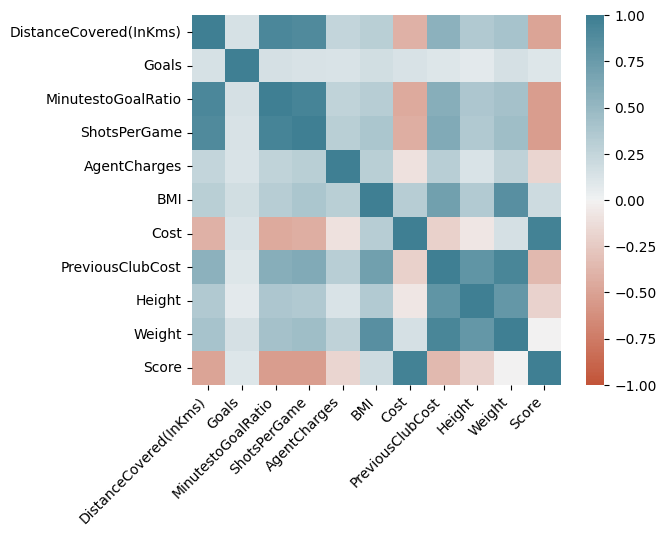

In [6]:
# Visualize the correlation
ax = sns.heatmap(
    df.corr(),
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


In [7]:
# Determine targets and features
X = df.iloc[:,[2, 3, 5, 6, 7, 8, 9]]
y = df.Score

display(X)
display(y)

,DistanceCovered(InKms),Goals,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost
0,3.96,7.5,12.3,60,20.56,109.1,63.32
1,4.41,8.3,12.7,68,20.67,102.8,58.55
2,4.14,5.0,11.6,21,21.86,104.6,55.36
3,4.11,5.3,12.6,69,21.88,126.4,57.18
4,4.45,6.8,14.0,29,18.96,80.3,53.20
...,...,...,...,...,...,...,...
197,4.90,7.6,16.0,90,27.56,67.2,82.00
198,5.66,8.3,17.7,38,23.76,56.5,72.00
199,5.03,6.4,14.3,122,22.01,47.6,68.00
200,4.97,8.8,14.9,233,22.34,60.4,63.00


0      19.75
1      21.30
2      19.88
3      23.66
4      17.64
       ...  
197    11.79
198    10.05
199     8.51
200    11.50
201     6.26
Name: Score, Length: 202, dtype: float64

In [8]:
# Split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75,
                                                random_state=42)

### Model Selection and Training

In [9]:
# Fit the linear regression model
X_train_with_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     203.9
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           2.63e-30
Time:                        04:25:50   Log-Likelihood:                -75.753
No. Observations:                  50   AIC:                             167.5
Df Residuals:                      42   BIC:                             182.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     14.1814      2.562      5.535      0.000       9.011      19.352
DistanceCovered(InKms)    -0.2884      0.843     -0.342      0.734      -1.989       1.412
Goals                      0.1077      0.109      0.990      0.328      -0.112       0.327
ShotsPerGame              -0.5191      0.305     -1.704      0.096      -1.134       0.096
AgentCharges              -0.0042      0.004     -1.099      0.278      -0.012       0.004
BMI                        0.1316      0.125      1.055      0.297      -0.120       0.383
Cost                       0.1430      0.010     13.999      0.000       0.122       0.164
PreviousClubCost          -0.0795      0.025     -3.150      0.003      -0.130      -0.029
==============================================================================
Omnibus:                        6.255   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.194
Skew:                           0.643   Prob(JB):                       0.0745
Kurtosis:                       3.916   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Feature Selection

In [10]:
X =  df.iloc[:,[2, 7, 8, 9]]
X

,DistanceCovered(InKms),BMI,Cost,PreviousClubCost
0,3.96,20.56,109.1,63.32
1,4.41,20.67,102.8,58.55
2,4.14,21.86,104.6,55.36
3,4.11,21.88,126.4,57.18
4,4.45,18.96,80.3,53.20
...,...,...,...,...
197,4.90,27.56,67.2,82.00
198,5.66,23.76,56.5,72.00
199,5.03,22.01,47.6,68.00
200,4.97,22.34,60.4,63.00


In [11]:
# Split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75,
                                                random_state=42)

In [12]:
# Fit the linear regression model
X_train_with_intercept = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     340.0
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           5.39e-33
Time:                        04:25:50   Log-Likelihood:                -78.592
No. Observations:                  50   AIC:                             167.2
Df Residuals:                      45   BIC:                             176.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     13.7519      2.504      5.492      0.000       8.709      18.795
DistanceCovered(InKms)    -1.3805      0.498     -2.772      0.008      -2.383      -0.378
BMI                        0.0163      0.114      0.143      0.887      -0.213       0.245
Cost                       0.1546      0.008     18.945      0.000       0.138       0.171
PreviousClubCost          -0.0751      0.025     -2.968      0.005      -0.126      -0.024
==============================================================================
Omnibus:                        2.112   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.348   Jarque-Bera (JB):                1.256
Skew:                           0.329   Prob(JB):                        0.534
Kurtosis:                       3.411   Cond. No.                     1.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Look at model plot
x_test_with_intercept = sm.add_constant(X_test)
y_pred = lr.predict(x_test_with_intercept)

#plot the scatter plot between the fitted values and actual test values for repsonse variable
fig = px.scatter(x=y_pred, y=y_test, template="plotly_dark", trendline="ols", height=400, width=650, title="OLS: Predicted vs Actual")
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")


### Scikit-Learn LinearRegression

In [14]:
# Instantiate model
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)


# Predict
y_pred = lr.predict(X_test)


fig = px.scatter(x=y_pred, y=y_test, template="plotly_dark", trendline="ols", height=400, width=650, title="Scikit-Learn: Predicted vs Actual")
fig.update_layout(xaxis_title="Predicted", yaxis_title="Actual")


In [15]:
# Calcualte R-Squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-Squared: {r2:.3f}")
print(f"Mean Squared Error: {rmse:.3f}")

R-Squared: 0.940
Mean Squared Error: 1.489
